## Observations and Insights 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results,how='inner',on="Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Checking the number of mice.
mouse_count=combined_df['Mouse ID'].count()
mouse_count

1893

In [44]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row=combined_df[combined_df.duplicated(('Mouse ID', 'Timepoint'))]
duplicate_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [45]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_row=combined_df[combined_df.duplicated('Mouse ID',)]
all_duplicate_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df.drop_duplicates('Mouse ID')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [47]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean=clean_df['Mouse ID'].count()
mouse_count_clean

249

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

mean=combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance=combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stnd_dv=combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem=combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.
summary_df=pd.DataFrame({'Mean': mean,'Median': median,'Variance': variance,'Standard deviation': stnd_dv,'SEM': sem})
summary_df


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggr=combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_aggr

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

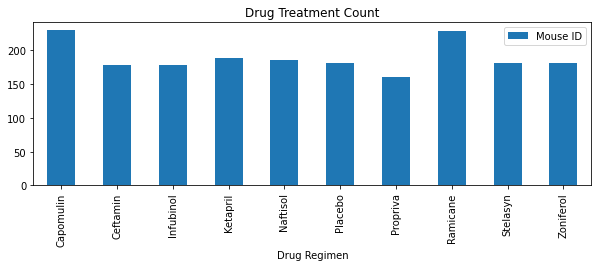

<Figure size 432x288 with 0 Axes>

In [50]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data=pd.DataFrame(combined_df.groupby(['Drug Regimen']).count()).reset_index()

drugs_df=drug_data[['Drug Regimen','Mouse ID']]
drugs_df=drugs_df.set_index('Drug Regimen')

#Bar Chart
drugs_df.plot(kind='bar',figsize=(10,3))

#add title and labels
plt.title('Drug Treatment Count')
plt.show()
plt.tight_layout()

In [51]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_list=summary_df.index.tolist()
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [52]:
drug_count=(combined_df.groupby(['Drug Regimen'])['Age_months'].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Count')

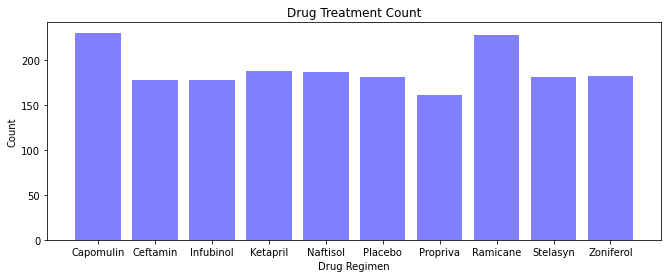

In [53]:
x_axis=np.arange(len(drug_count))

#assign x-axis
x_axis=drug_list

#creating and customizing bar chart
plt.figure(figsize=(11,4))
plt.bar(x_axis,drug_count,color='b',alpha=0.5,align='center')

#add labels and title
plt.title('Drug Treatment Count')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df=pd.DataFrame(combined_df.groupby(['Sex']).count()).reset_index()
gender_df.head()


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [56]:
#alter the dataframe down to two columns
gender_df=gender_df[['Sex','Mouse ID']]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

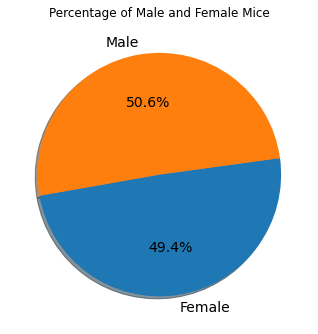

In [57]:
#pie chart 
plt.figure(figsize=(12,6))
ax1=plt.subplot(121,aspect='equal')
gender_df.plot(kind='pie',y='Mouse ID',ax=ax1,autopct='%1.1f%%',startangle=190,shadow=True,labels=gender_df['Sex'],legend=False,fontsize=14)

#add labels and titles
plt.title('Percentage of Male and Female Mice')
plt.xlabel('')
plt.ylabel('')

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=(combined_df.groupby(['Sex'])['Age_months'].count()).tolist()
gender_count

[935, 958]

In [59]:
#add details to the pie chart
labels=['Females','Males']
colors=['blue','orange']
explode=(0.1,0)

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

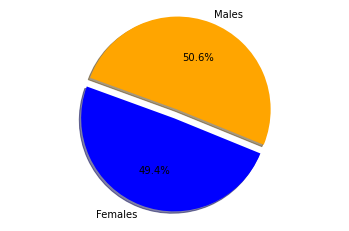

In [60]:
#create pie chart
plt.pie(gender_count,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=160)
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [62]:
# Start by getting the last (greatest) timepoint for each mouse

max_timepoint=pd.DataFrame(combined_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint':'max_timepoint'})
max_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

drug_list=pd.merge(combined_df,max_timepoint, on='Mouse ID')
drug_list.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin 

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
drugs=['Capomulin','Ramicane','Infubinol','Ceftamin']
   
drug_values=[]

#quartitle calculation for each drug
for drug in drugs:
    
    temp_df=drug_list.loc[drug_list['Drug Regimen']==drug]
    #create subset dataframe that narrow down to rows only containing the final timepoint for each regimen 
    final_vol=temp_df.loc[temp_df['Timepoint']==temp_df['max_timepoint']]
    
    #create a series that consists of all final volume values for each regimen 
    values=final_vol['Tumor Volume (mm3)']
    drug_values.append(values)
    
    #calculate and print IQR for each regimen 
    quartiles=values.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    print(f"IQR for{drug}:{iqr}")
    
    #upper and lower bounds to identify outliers for each regimen 
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    print(f"Lower Bound for{drug}:{lower_bound}")
    print(f"Upper Bound for{drug}:{upper_bound}")
    
    #quantitatively check for outliers
    outliers_count=(values.loc[(final_vol['Tumor Volume (mm3)']>=upper_bound)|
                               (final_vol['Tumor Volume (mm3)']<=lower_bound)]).count()
    print(f"Number of {drug}outliers:{outliers_count}")


IQR forCapomulin:7.781863460000004
Lower Bound forCapomulin:20.70456164999999
Upper Bound forCapomulin:51.83201549
Number of Capomulinoutliers:0
IQR forRamicane:9.098536719999998
Lower Bound forRamicane:17.912664470000003
Upper Bound forRamicane:54.30681135
Number of Ramicaneoutliers:0
IQR forInfubinol:11.477135160000003
Lower Bound forInfubinol:36.83290494999999
Upper Bound forInfubinol:82.74144559000001
Number of Infubinoloutliers:1
IQR forCeftamin:15.577752179999997
Lower Bound forCeftamin:25.355449580000002
Upper Bound forCeftamin:87.66645829999999
Number of Ceftaminoutliers:0


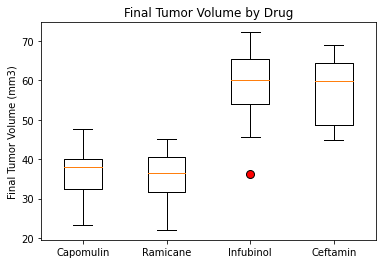

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#edit outliers on boxplot for visibility
flierprops=dict(marker='o',markerfacecolor='r',markersize=8,markeredgecolor='black')

#plot boxplot
plt.boxplot(drug_values,flierprops=flierprops)

#add title and labels 

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
                      
                      
plt.show()

## Line and Scatter Plots

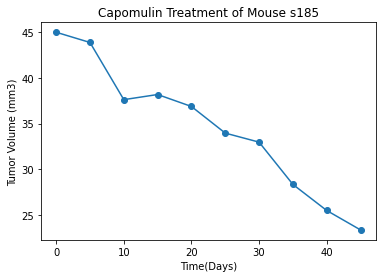

In [66]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#identify data points of a mouse treated with capomulin
mouse=combined_df.loc[combined_df['Mouse ID']=='s185']

#plot line chart with time values on the x-axis and the tumor volume values on the y-axis
#marker='o'adds cirlces on each data point for visibility
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'],marker='o')

#add labels and titles
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse s185')

plt.show()

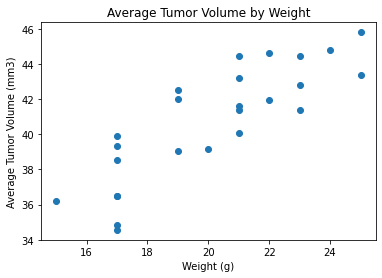

In [67]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#isolate cases that only use capomulin regimen
capomulin_df=combined_df.loc[combined_df['Drug Regimen']=='Capomulin']

#find avg tumor vol for each mouse

avg_tumor=pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'avg_tumor_vol'})

#merge average tumor volume onto combined_df and drop duplicates

avg_tumor=pd.merge(capomulin_df,avg_tumor, on='Mouse ID')
final_avg=avg_tumor[['Weight (g)','avg_tumor_vol']].drop_duplicates()

final_avg

x=final_avg['Weight (g)']
y=final_avg['avg_tumor_vol']

#scatter plot based on new dataframe 

plt.scatter(x,y)

#add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')

plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume on the capomulin regimen is0.84.


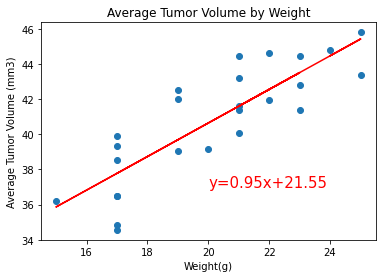

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#duplicate code from scatter plot from above 

capomulin_df=combined_df.loc[combined_df['Drug Regimen']=='Capomulin']
avg_tumor=pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'avg_tumor_vol'})
avg_tumor=pd.merge(capomulin_df,avg_tumor, on='Mouse ID')
final_avg=avg_tumor[['Weight (g)','avg_tumor_vol']].drop_duplicates()

final_avg

x=final_avg['Weight (g)']
y=final_avg['avg_tumor_vol']

#correlation between mouse weight and avg tumor volume
correlation=st.pearsonr(x,y)

#print the ans to above calculation
print(f"The correlation between weight and average tumor volume on the capomulin regimen is{round(correlation[0],2)}.")

#linear regression 
(slope, intercept, rvalue,pvalue,stderr)=linregress(x,y)
regress_values=x*slope+intercept 
line_eq='y='+ str(round(slope,2))+'x+'+str(round(intercept,2))

#plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,'r-')

#annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color='red')

#add labels and titles
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')
plt.show()